In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set_context('talk', font_scale=0.85)
import math


sns.set_palette('husl')

In [2]:
df_99 = pd.read_csv('Trial_99_Cleaned' )
df_51 = pd.read_csv('Trial_051_Cleaned')

In [3]:
def plotting (df1,df2,col, title, sort=True):
    """bar plot with the two trials with frequency above bars for each respected column"""
    
    if len(df1[col].value_counts()) == len(df2[col].value_counts()):
        N  = len(df1[col].value_counts())
    else:
        N = len(df2[col].value_counts())
    ind = np.arange(N)
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(7.5,4))

    
    if sort==True:
        p1 = (df1[col].value_counts()).reindex(['Improved', 'No effect', 'Less good'])
        p2 = (df2[col].value_counts()).reindex(['Improved', 'No effect', 'Less good'])
        
        bar1 = ax.bar(ind, p1, width, color='r')
        bar2 = ax.bar(ind + width, p2, width, color='b')
    
        ax.set_xticks(ind + width /2)
        ax.set_xticklabels(['Improved', 'No effect', 'Less good'])
        
        ax.set_title(str(title))
        ax.legend(('Trial 99', 'Trial 51'))
        
        for rect in ax.patches:
            height = rect.get_height()
            if math.isnan(height)==False:
                ax.text(rect.get_x() + rect.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
    else:
        p1 = df1[col].value_counts()
        p2 = df2[col].value_counts()
        
        bar1 = ax.bar(ind, p1, width, color='r')
        bar2 = ax.bar(ind + width, p2, width, color='b')
    
        ax.set_xticks(ind + width /2)
        ax.set_xticklabels(df1[col].dropna().unique())
        ax.set_title(str(title))
        ax.legend(('Trial 99', 'Trial 51'))
        
        for rect in ax.patches:
            height = rect.get_height()
            if math.isnan(height)==False:
                ax.text(rect.get_x() + rect.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
 
    
    plt.tight_layout()
    plt.show()

In [4]:
def basicinfo(df, col):
    """descriptive stats of the coloumn and the proportion """
    print (df[col].value_counts())
    print ('\t')
    print(df[col].describe())
    print ('\t') 
    print((df[col].value_counts()) / df[col].value_counts().sum())


In [5]:
def OT_plot(df, col, title):
    """Plots the Frequency of the respected column over time"""
    table = pd.crosstab(index=df['Version_Duration'], columns=df[col])
    
    f, ax = plt.subplots(1)
    
    table.plot(marker='o',figsize=(6.5,4.5), linestyle='--', ax=ax)
    plt.title(str(title) + ' ' + 'Over Time')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.tight_layout()
    
    handles, labels = ax.get_legend_handles_labels()
    handles = [handles[i] for i in range(len(handles))]
    labels = [labels[i] for i in range(len(labels))]
    
    ax.legend(handles, labels, loc=1)

In [6]:
x_order1 = ['Excellent','OK','Poor']
x_order2 = ['Improved', 'No effect', 'Less good']

def count_plot(df, col, title):
    """creates count plot that is further categorized by the rating they tend to give"""
    if df is df_99:
        fig, ax = plt.subplots(figsize=(7.5,4))

        ax = sns.countplot(x=col, data=df, hue='Overall_Exp_Rating', order=x_order2 )
        
        total = len(df[col])
        for p in ax.patches:
            height = p.get_height()
            if math.isnan(height)==False:
                ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')   
                
                ax.set_title(str(title) + ' ' + 'by Overall Experience Rating')
                ax.set_xlabel(' ')
                ax.legend(loc='upper right')
                plt.tight_layout()
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(7.5,4))

        ax = sns.countplot(x=col, data=df, hue='Overall_Exp_Rating', order=x_order2, palette='cubehelix')
        ax.legend(loc='upper right')
        total = len(df[col])
        for p in ax.patches:
            height = p.get_height()
            if math.isnan(height) == False: 
                ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')   
                ax.legend(loc='upper right')
                ax.set_title(str(title) + ' ' + 'by Overall Experience Rating')
                ax.set_xlabel(' ')
                plt.tight_layout()
    
        plt.show()

In [7]:
len(df_99.Last_Name.unique()) #40 unique users

40

In [8]:
len(df_99.Last_Name) # total sample of users

103

In [9]:
len(df_51.Last_Name.unique()) #47 unique users 

47

In [10]:
len(df_51.Last_Name)

133

## Overall Experience


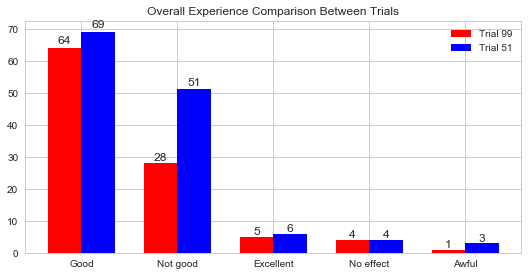

In [11]:
plotting(df_99,df_51, 'Overall_Experience', 'Overall Experience Comparison Between Trials', sort=False)


In [12]:
basicinfo(df_99,'Overall_Experience') # trial 99

Good         64
Excellent    28
No effect     5
Not good      4
Awful         1
Name: Overall_Experience, dtype: int64
	
count      102
unique       5
top       Good
freq        64
Name: Overall_Experience, dtype: object
	
Good         0.627451
Excellent    0.274510
No effect    0.049020
Not good     0.039216
Awful        0.009804
Name: Overall_Experience, dtype: float64


In [13]:
basicinfo(df_51,'Overall_Experience')

Good         69
Excellent    51
No effect     6
Awful         4
Not good      3
Name: Overall_Experience, dtype: int64
	
count      133
unique       5
top       Good
freq        69
Name: Overall_Experience, dtype: object
	
Good         0.518797
Excellent    0.383459
No effect    0.045113
Awful        0.030075
Not good     0.022556
Name: Overall_Experience, dtype: float64


In [14]:
#ax = sns.countplot(x="Overall_Experience", data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'])
#ax.set_title('Overall Experience Trial 99')

#total = (len(df_99))
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha='center')
#plt.show()

In [15]:
#g = df_99.groupby(['Overall_Experience']).size().sort_values(ascending=True)
#g.plot(kind='barh')

#for y, x in enumerate(g):
#    plt.annotate(str(x), xy=(x,y), va='center')

Text(0.5,1,'Overall Experience by User Comparison Trial 99')

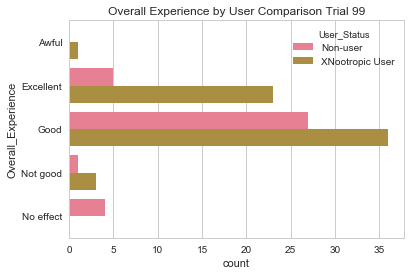

In [16]:
sns.countplot(y="Overall_Experience",hue='User_Status', data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'] )
plt.title('Overall Experience by User Comparison Trial 99')

Text(0.5,1,'Overall Experience by User Comparison Trial 51')

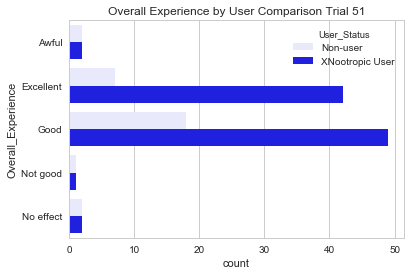

In [17]:
sns.countplot(y="Overall_Experience",hue='User_Status', data=df_51, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'], color='Blue' )
plt.title('Overall Experience by User Comparison Trial 51')

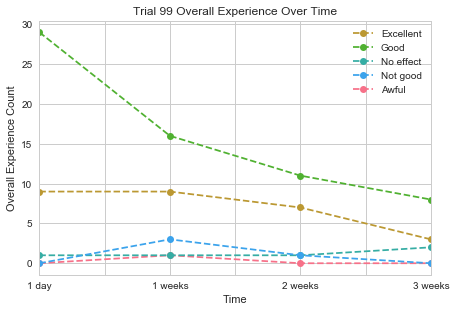

In [117]:
#comparing the counts of overall experience values over time 
OE_overtime = pd.crosstab(index=df_99.Version_Duration, columns=df_99.Overall_Experience)


f, ax = plt.subplots(1)
OE_overtime.plot(marker='o', figsize=(6.5,4.5), linestyle='--',ax=ax)
plt.title('Trial 99 Overall Experience Over Time')
plt.xlabel('Time')
plt.ylabel('Overall Experience Count')
plt.tight_layout()


#plt.legend(['Excellent','Good','No effect','Not good', 'No effect'])



handles,labels = ax.get_legend_handles_labels()

handles = [ handles[1], handles[2], handles[3], handles[4], handles[0]]
labels = [ labels[1], labels[2], labels[3], labels[4], labels[0]]

ax.legend(handles,labels,loc=1)


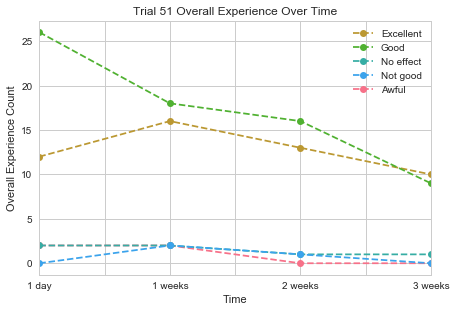

In [118]:
#comparing the counts of overall experience values over time 
OE_overtime = pd.crosstab(index=df_51.Version_Duration, columns=df_51.Overall_Experience)


f, ax = plt.subplots(1)
OE_overtime.plot(marker='o', figsize=(6.5,4.5), linestyle='--',ax=ax)
plt.title('Trial 51 Overall Experience Over Time')
plt.xlabel('Time')
plt.ylabel('Overall Experience Count')
plt.tight_layout()


#plt.legend(['Excellent','Good','No effect','Not good', 'No effect'])



handles,labels = ax.get_legend_handles_labels()

handles = [ handles[1], handles[2], handles[3], handles[4], handles[0]]
labels = [ labels[1], labels[2], labels[3], labels[4], labels[0]]

ax.legend(handles,labels,loc=1)


In [20]:
#comparing between users and non-users based on their overall experience over time

OE_USER_COMP = pd.crosstab(index=[df_99['Version_Duration'],df_99['User_Status']], columns=df_99['Overall_Experience'],)

OE_USER_COMP

Overall_Experience                Awful  Excellent  Good  No effect  Not good
Version_Duration User_Status                                                 
1 day            Non-user             0          2    12          0         0
                 XNootropic User      0          7    17          0         0
1 weeks          Non-user             0          1     8          1         1
                 XNootropic User      1          8     8          0         2
2 weeks          Non-user             0          1     4          1         0
                 XNootropic User      0          6     6          0         1
3 weeks          Non-user             0          1     3          2         0
                 XNootropic User      0          2     5          0         0

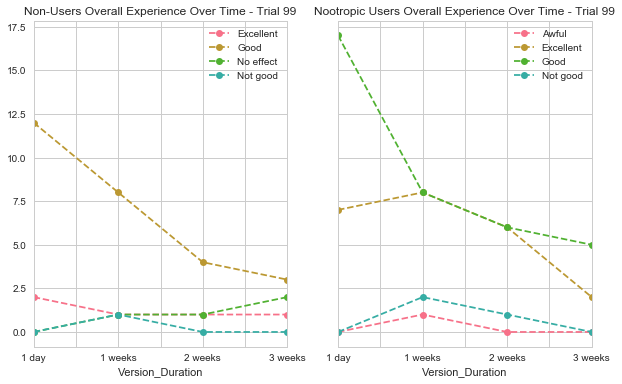

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,figsize=(10,6))


non_users = df_99[df_99.User_Status=='Non-user']
n_users = pd.crosstab(index=non_users['Version_Duration'], columns=non_users['Overall_Experience'])
n_users.plot(marker='o', linestyle='--', ax=ax1,legend=True )
ax1.set_title('Non-Users Overall Experience Over Time - Trial 99')

handles1,labels1 = ax1.get_legend_handles_labels()

handles1 = [ handles1[i] for i in range(len(handles1))]
labels1 = [ labels1[i] for i in range(len(labels1)) ]

ax1.legend(handles1,labels1,loc=1)

users = df_99[df_99.User_Status=='XNootropic User']
users = pd.crosstab(index=users['Version_Duration'], columns=users['Overall_Experience'])
users.plot(marker='o', linestyle='--', ax=ax2, legend=True)
ax2.set_title('Nootropic Users Overall Experience Over Time - Trial 99')

handles2,labels2 = ax2.get_legend_handles_labels()

handles2 = [handles2[i] for i in range(len(handles2))]
labels2 = [ labels2[i] for i in range(len(labels2)) ]

ax2.legend(handles2,labels2,loc=1)


In [22]:
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}

In [23]:
#changing the categorical/ordinal variables into numeric values and creating a new column with the numeric rank values
overall_exp_rank = {'Excellent': 5, 'Good':4, 'No effect': 3, 'Not good':2, 'Awful':1}
df_99['Overall_Exp_Rating'] = df_99['Overall_Experience'].map(rating)

In [24]:
df_51['Overall_Exp_Rating'] = df_51['Overall_Experience'].map(rating)

## Sleep Quality

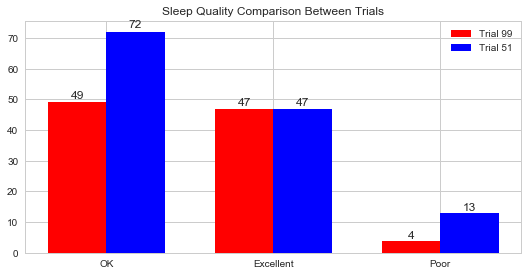

In [25]:
plotting(df_99, df_51, 'Sleep_Quality', 'Sleep Quality Comparison Between Trials', sort=False)

In [26]:
basicinfo(df_99, 'Sleep_Quality') #trial 99

OK           49
Excellent    47
Poor          4
Name: Sleep_Quality, dtype: int64
	
count     100
unique      3
top        OK
freq       49
Name: Sleep_Quality, dtype: object
	
OK           0.49
Excellent    0.47
Poor         0.04
Name: Sleep_Quality, dtype: float64


In [27]:
basicinfo(df_51, 'Sleep_Quality') # trial 51

OK           72
Excellent    47
Poor         13
Name: Sleep_Quality, dtype: int64
	
count     132
unique      3
top        OK
freq       72
Name: Sleep_Quality, dtype: object
	
OK           0.545455
Excellent    0.356061
Poor         0.098485
Name: Sleep_Quality, dtype: float64


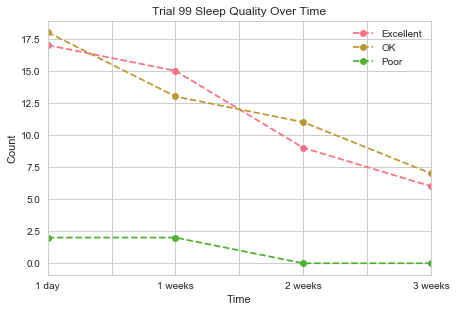

In [28]:
OT_plot(df_99, 'Sleep_Quality', 'Trial 99 Sleep Quality')

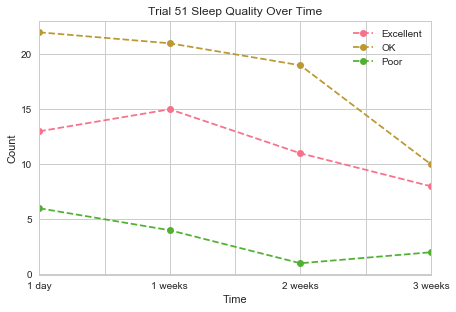

In [29]:
OT_plot(df_51, 'Sleep_Quality', 'Trial 51 Sleep Quality')

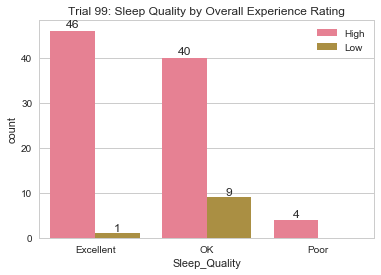

In [30]:

ax = sns.countplot(x='Sleep_Quality', data=df_99, hue='Overall_Exp_Rating', order=x_order1)
        
total = len(df_99['Sleep_Quality'])
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height) == False:
        ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
        ax.legend(loc='upper right')
        ax.set_title('Trial 99: Sleep Quality by Overall Experience Rating')


Text(0.5,1,'Trial 99: Sleep Quality by User')

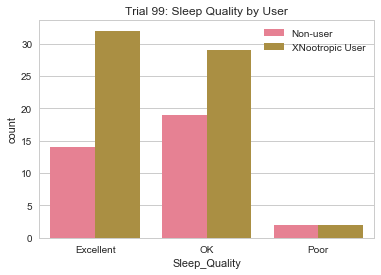

In [31]:
sns.countplot(x="Sleep_Quality", hue='User_Status',  data=df_99, order=x_order1)
plt.legend(loc='upper right')
plt.title('Trial 99: Sleep Quality by User')


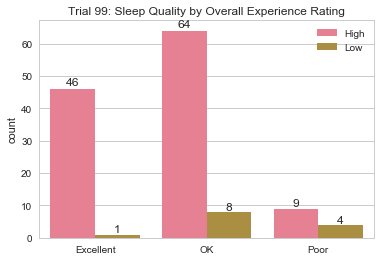

In [32]:

ax = sns.countplot(x='Sleep_Quality', data=df_51, hue='Overall_Exp_Rating', order=x_order1)
        
total = len(df_51['Sleep_Quality'])
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height) == False:
        ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
        ax.legend(loc='upper right')
        ax.set_title('Trial 99: Sleep Quality by Overall Experience Rating')
        ax.set_xlabel(' ')

# Focus, Attention, and Concentration

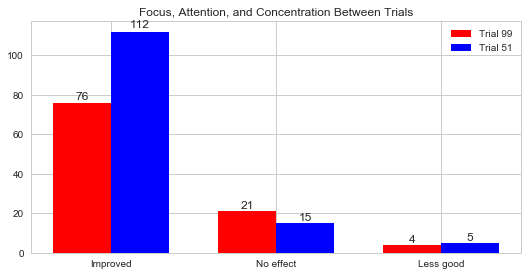

In [33]:
plotting(df_99, df_51, 'Focus_Atten_Concen', 'Focus, Attention, and Concentration Between Trials', sort=True)

In [34]:
basicinfo(df_99, 'Focus_Atten_Concen') #trial 99

Improved     76
No effect    21
Less good     4
Name: Focus_Atten_Concen, dtype: int64
	
count          101
unique           3
top       Improved
freq            76
Name: Focus_Atten_Concen, dtype: object
	
Improved     0.752475
No effect    0.207921
Less good    0.039604
Name: Focus_Atten_Concen, dtype: float64


In [35]:
basicinfo(df_51, 'Focus_Atten_Concen') #trial 51

Improved     112
No effect     15
Less good      5
Name: Focus_Atten_Concen, dtype: int64
	
count          132
unique           3
top       Improved
freq           112
Name: Focus_Atten_Concen, dtype: object
	
Improved     0.848485
No effect    0.113636
Less good    0.037879
Name: Focus_Atten_Concen, dtype: float64


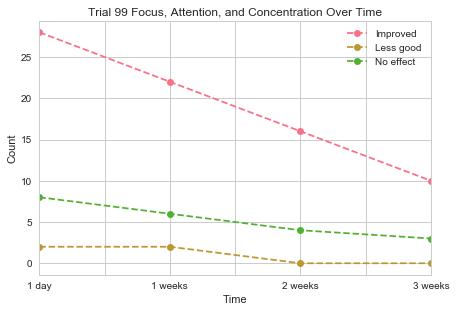

In [36]:
OT_plot(df_99, 'Focus_Atten_Concen', 'Trial 99 Focus, Attention, and Concentration')

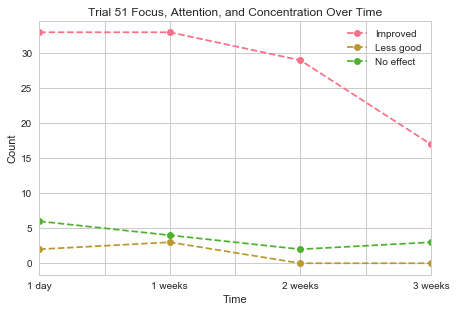

In [37]:
OT_plot(df_51, 'Focus_Atten_Concen', 'Trial 51 Focus, Attention, and Concentration')

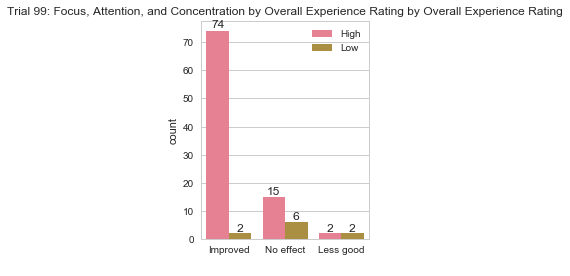

In [38]:
count_plot(df_99, 'Focus_Atten_Concen', 'Trial 99: Focus, Attention, and Concentration by Overall Experience Rating')


Text(0.5,1,'Trial 99: Focus, Attention and Concentration by User')

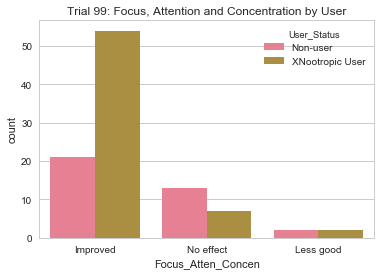

In [39]:
sns.countplot(x='Focus_Atten_Concen', data=df_99, hue='User_Status', order=x_order2)
plt.title('Trial 99: Focus, Attention and Concentration by User')

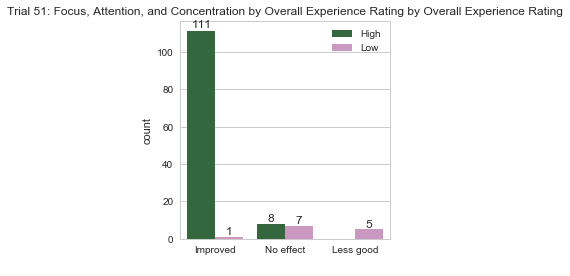

In [40]:
count_plot(df_51, 'Focus_Atten_Concen', 'Trial 51: Focus, Attention, and Concentration by Overall Experience Rating')

## Memory

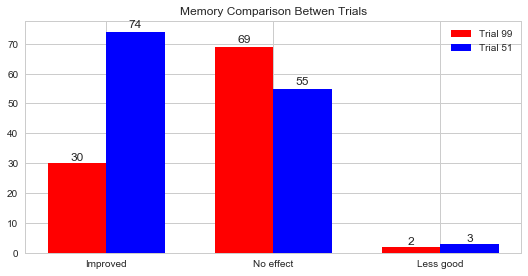

In [41]:
plotting(df_99, df_51, 'Memory', 'Memory Comparison Betwen Trials', sort=True)

In [42]:
basicinfo(df_99, 'Memory') #trial 99

No effect    69
Improved     30
Less good     2
Name: Memory, dtype: int64
	
count           101
unique            3
top       No effect
freq             69
Name: Memory, dtype: object
	
No effect    0.683168
Improved     0.297030
Less good    0.019802
Name: Memory, dtype: float64


In [43]:
basicinfo(df_51, 'Memory') #trial 51

Improved     74
No effect    55
Less good     3
Name: Memory, dtype: int64
	
count          132
unique           3
top       Improved
freq            74
Name: Memory, dtype: object
	
Improved     0.560606
No effect    0.416667
Less good    0.022727
Name: Memory, dtype: float64


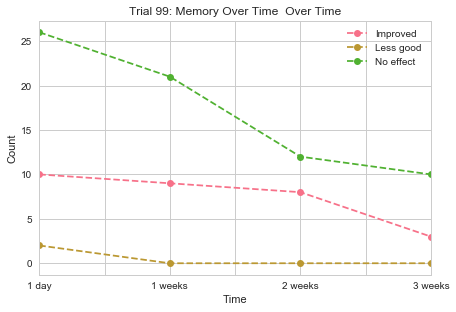

In [44]:
OT_plot(df_99, 'Memory', 'Trial 99: Memory Over Time ')

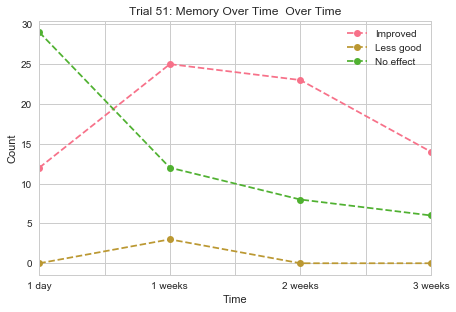

In [45]:
OT_plot(df_51, 'Memory', 'Trial 51: Memory Over Time ')

Text(0.5,1,'Trial 99 Memory by User Comparison')

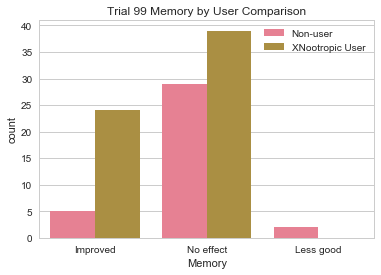

In [46]:
sns.countplot(x='Memory', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Trial 99 Memory by User Comparison')

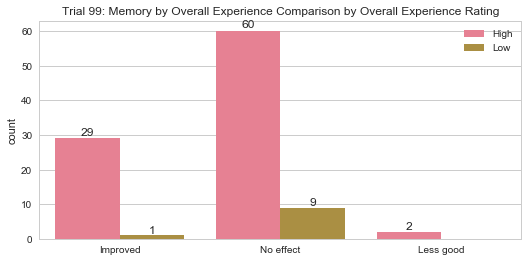

In [47]:
count_plot(df_99, 'Memory','Trial 99: Memory by Overall Experience Comparison')


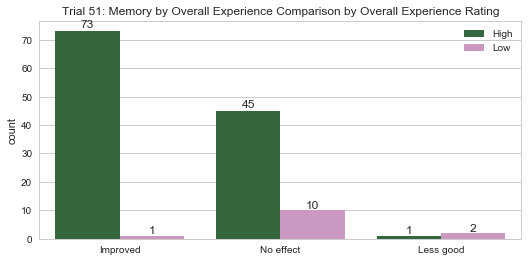

In [48]:
count_plot(df_51, 'Memory', 'Trial 51: Memory by Overall Experience Comparison')

# Drive, Passion and Motivation

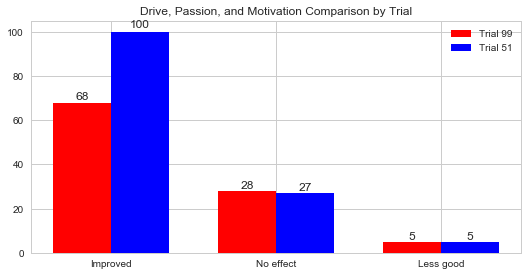

In [49]:
plotting(df_99, df_51, 'Drive_Passion_Motivation', 'Drive, Passion, and Motivation Comparison by Trial', sort=True)

In [50]:
basicinfo(df_99, 'Drive_Passion_Motivation') # trial 99

Improved     68
No effect    28
Less good     5
Name: Drive_Passion_Motivation, dtype: int64
	
count          101
unique           3
top       Improved
freq            68
Name: Drive_Passion_Motivation, dtype: object
	
Improved     0.673267
No effect    0.277228
Less good    0.049505
Name: Drive_Passion_Motivation, dtype: float64


In [51]:
basicinfo(df_51, 'Drive_Passion_Motivation') # trial 51

Improved     100
No effect     27
Less good      5
Name: Drive_Passion_Motivation, dtype: int64
	
count          132
unique           3
top       Improved
freq           100
Name: Drive_Passion_Motivation, dtype: object
	
Improved     0.757576
No effect    0.204545
Less good    0.037879
Name: Drive_Passion_Motivation, dtype: float64


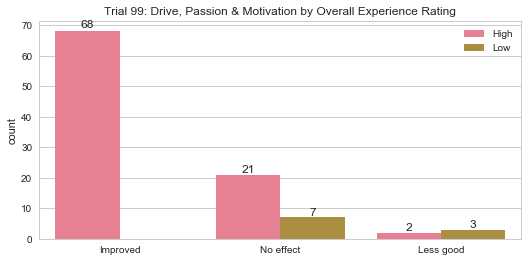

In [52]:
count_plot(df_99,'Drive_Passion_Motivation','Trial 99: Drive, Passion & Motivation')

Text(0.5,1,'Trial 99: Drive, Passion & Motivation by User')

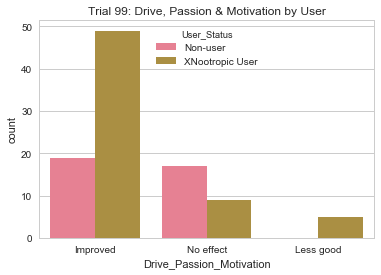

In [53]:
sns.countplot(x='Drive_Passion_Motivation', data=df_99, hue='User_Status', order=x_order2)
plt.title('Trial 99: Drive, Passion & Motivation by User')

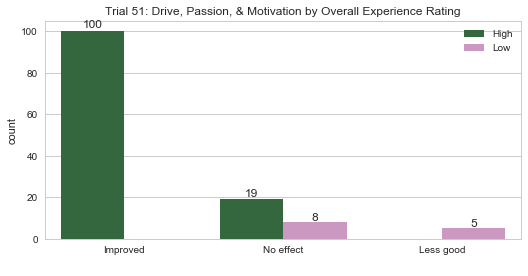

In [54]:
count_plot(df_51, 'Drive_Passion_Motivation', 'Trial 51: Drive, Passion, & Motivation')

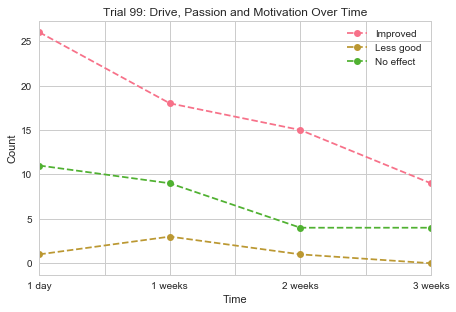

In [55]:
OT_plot(df_99, 'Drive_Passion_Motivation', 'Trial 99: Drive, Passion and Motivation')

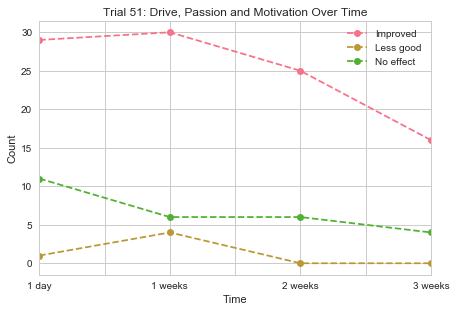

In [56]:
OT_plot(df_51, 'Drive_Passion_Motivation', 'Trial 51: Drive, Passion and Motivation')

# Physical Energy

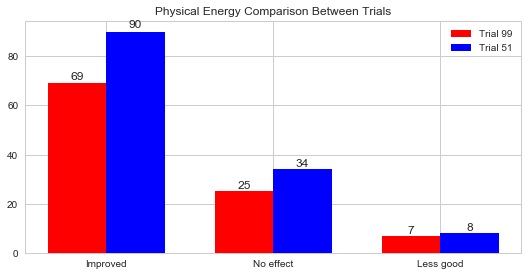

In [57]:
plotting(df_99, df_51, 'Physical_Energy', 'Physical Energy Comparison Between Trials')

In [58]:
basicinfo(df_99, 'Physical_Energy')

Improved     69
No effect    25
Less good     7
Name: Physical_Energy, dtype: int64
	
count          101
unique           3
top       Improved
freq            69
Name: Physical_Energy, dtype: object
	
Improved     0.683168
No effect    0.247525
Less good    0.069307
Name: Physical_Energy, dtype: float64


In [59]:
basicinfo(df_51, 'Physical_Energy')

Improved     90
No effect    34
Less good     8
Name: Physical_Energy, dtype: int64
	
count          132
unique           3
top       Improved
freq            90
Name: Physical_Energy, dtype: object
	
Improved     0.681818
No effect    0.257576
Less good    0.060606
Name: Physical_Energy, dtype: float64


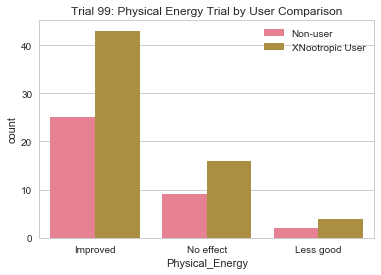

In [60]:
sns.countplot(x='Physical_Energy', data=df_99, hue='User_Status', order=x_order2)
plt.title('Trial 99: Physical Energy Trial by User Comparison')
plt.legend(loc='upper right')


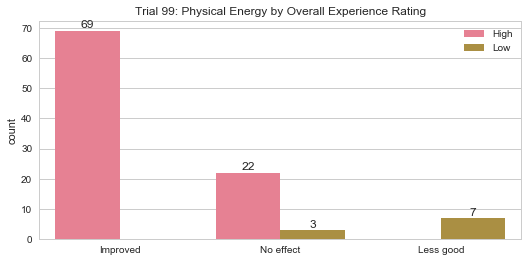

In [61]:
count_plot(df_99, 'Physical_Energy', 'Trial 99: Physical Energy')

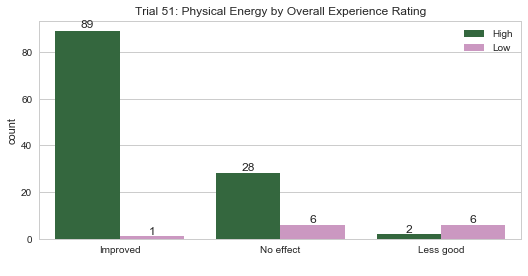

In [62]:
count_plot(df_51, 'Physical_Energy', 'Trial 51: Physical Energy')

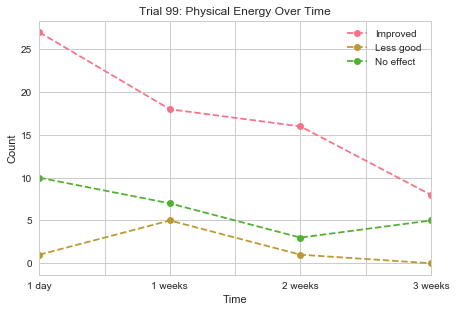

In [63]:
OT_plot(df_99, 'Physical_Energy', 'Trial 99: Physical Energy')

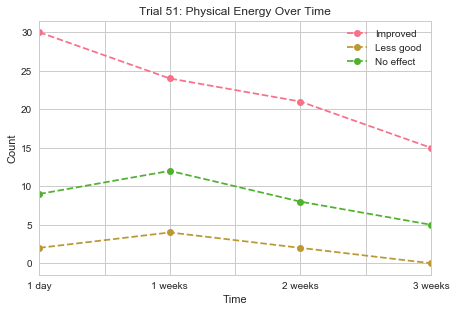

In [64]:
OT_plot(df_51, 'Physical_Energy', 'Trial 51: Physical Energy')

Text(0.5,1,'Physical Energy Trial 51')

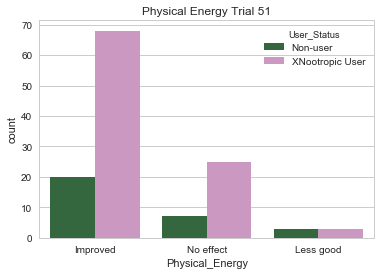

In [65]:
sns.countplot(x='Physical_Energy', data=df_51,hue='User_Status', order=x_order2, palette='cubehelix')
plt.title('Physical Energy Trial 51')

# Capacity for Productivity

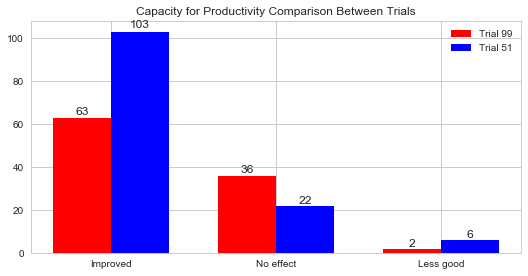

In [66]:
plotting(df_99, df_51, 'Capacity_Productivity', 'Capacity for Productivity Comparison Between Trials')

In [67]:
basicinfo(df_99, 'Capacity_Productivity') #trial 99

Improved     63
No effect    36
Less good     2
Name: Capacity_Productivity, dtype: int64
	
count          101
unique           3
top       Improved
freq            63
Name: Capacity_Productivity, dtype: object
	
Improved     0.623762
No effect    0.356436
Less good    0.019802
Name: Capacity_Productivity, dtype: float64


In [68]:
basicinfo(df_51, 'Capacity_Productivity') #trial 51

Improved     103
No effect     22
Less good      6
Name: Capacity_Productivity, dtype: int64
	
count          131
unique           3
top       Improved
freq           103
Name: Capacity_Productivity, dtype: object
	
Improved     0.786260
No effect    0.167939
Less good    0.045802
Name: Capacity_Productivity, dtype: float64


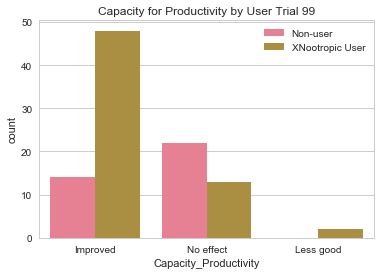

In [69]:
sns.countplot(x='Capacity_Productivity', data=df_99, hue='User_Status', order=x_order2)
plt.title('Capacity for Productivity by User Trial 99')
plt.legend(loc='upper right')

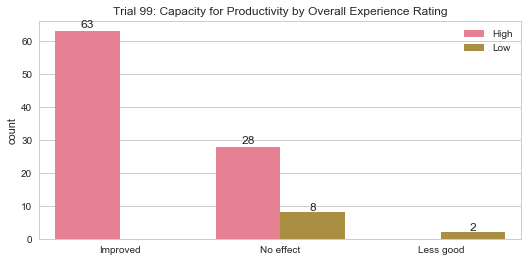

In [70]:
count_plot(df_99, 'Capacity_Productivity', 'Trial 99: Capacity for Productivity')

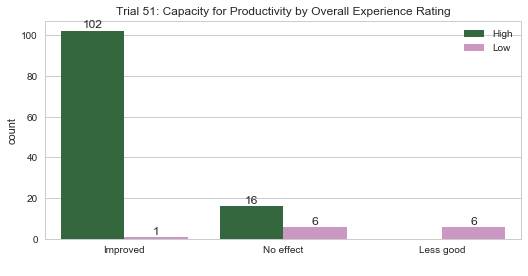

In [71]:
count_plot(df_51, 'Capacity_Productivity', 'Trial 51: Capacity for Productivity')

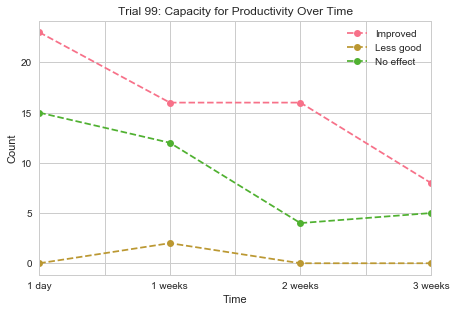

In [72]:
OT_plot(df_99, 'Capacity_Productivity', 'Trial 99: Capacity for Productivity')

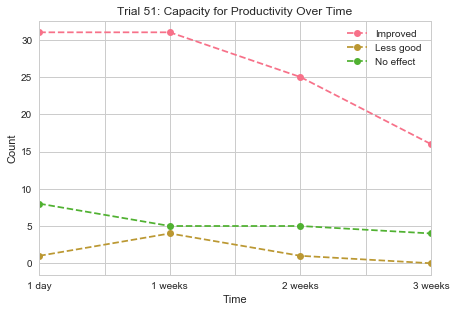

In [73]:
OT_plot(df_51, 'Capacity_Productivity', 'Trial 51: Capacity for Productivity')

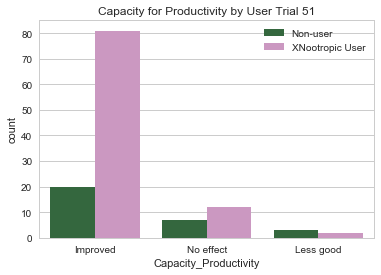

In [74]:
sns.countplot(x='Capacity_Productivity', data=df_51, hue='User_Status', order=x_order2, palette='cubehelix')
plt.title('Capacity for Productivity by User Trial 51')
plt.legend(loc='upper right')

# Decisiveness

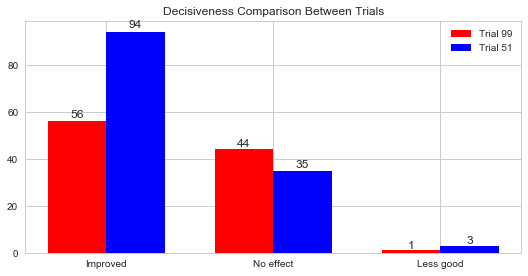

In [75]:
plotting(df_99, df_51, 'Decisiveness', 'Decisiveness Comparison Between Trials')

In [76]:
basicinfo(df_99, 'Decisiveness') #trial99

Improved     56
No effect    44
Less good     1
Name: Decisiveness, dtype: int64
	
count          101
unique           3
top       Improved
freq            56
Name: Decisiveness, dtype: object
	
Improved     0.554455
No effect    0.435644
Less good    0.009901
Name: Decisiveness, dtype: float64


In [77]:
basicinfo(df_51, 'Decisiveness') # trial 51

Improved     94
No effect    35
Less good     3
Name: Decisiveness, dtype: int64
	
count          132
unique           3
top       Improved
freq            94
Name: Decisiveness, dtype: object
	
Improved     0.712121
No effect    0.265152
Less good    0.022727
Name: Decisiveness, dtype: float64


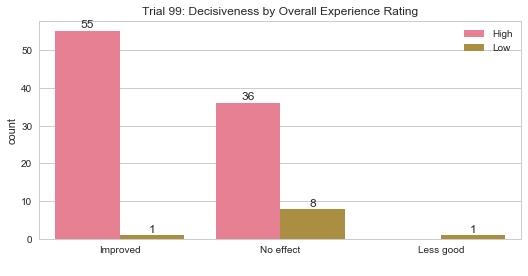

In [78]:
count_plot(df_99, 'Decisiveness', 'Trial 99: Decisiveness')

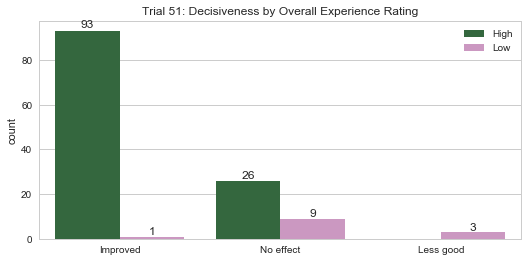

In [79]:
count_plot(df_51, 'Decisiveness', 'Trial 51: Decisiveness')

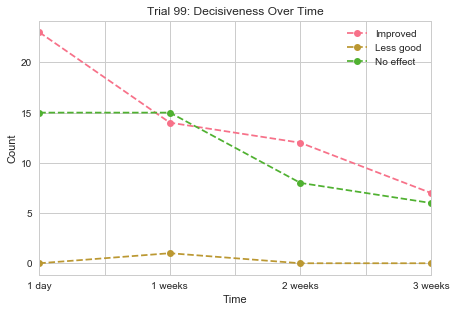

In [80]:
OT_plot(df_99, 'Decisiveness', 'Trial 99: Decisiveness')

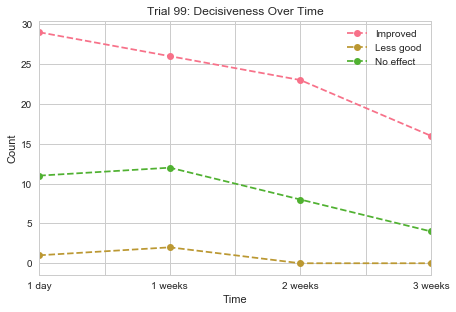

In [81]:
OT_plot(df_51, 'Decisiveness', 'Trial 99: Decisiveness')

Text(0.5,1,'Decisiveness')

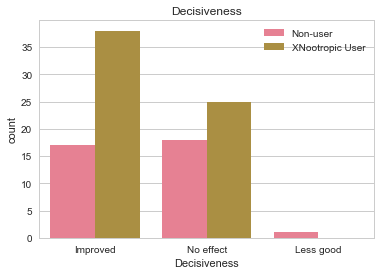

In [82]:
sns.countplot(x='Decisiveness', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Decisiveness')

# Verbal Fluency Word Recall

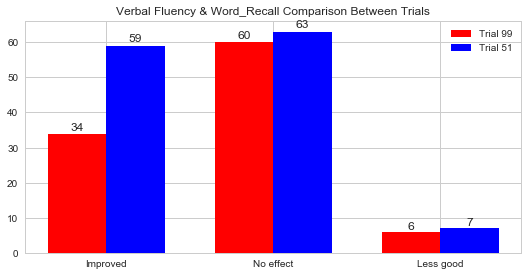

In [83]:
plotting(df_99, df_51, 'Verbal_Fluency_Word_Recall', 'Verbal Fluency & Word_Recall Comparison Between Trials', sort=True)

In [84]:
basicinfo(df_99, 'Verbal_Fluency_Word_Recall')

No effect    60
Improved     34
Less good     6
Name: Verbal_Fluency_Word_Recall, dtype: int64
	
count           100
unique            3
top       No effect
freq             60
Name: Verbal_Fluency_Word_Recall, dtype: object
	
No effect    0.60
Improved     0.34
Less good    0.06
Name: Verbal_Fluency_Word_Recall, dtype: float64


In [85]:
basicinfo(df_51, 'Verbal_Fluency_Word_Recall')

No effect    63
Improved     59
Less good     7
Name: Verbal_Fluency_Word_Recall, dtype: int64
	
count           129
unique            3
top       No effect
freq             63
Name: Verbal_Fluency_Word_Recall, dtype: object
	
No effect    0.488372
Improved     0.457364
Less good    0.054264
Name: Verbal_Fluency_Word_Recall, dtype: float64


Text(0.5,1,'Trial 99: Verbal Fluency Word Recall')

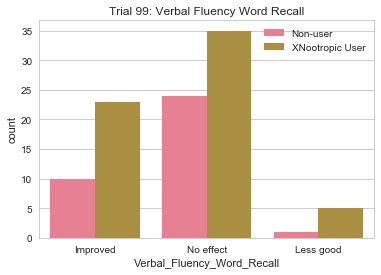

In [86]:
sns.countplot(x='Verbal_Fluency_Word_Recall', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Trial 99: Verbal Fluency Word Recall')

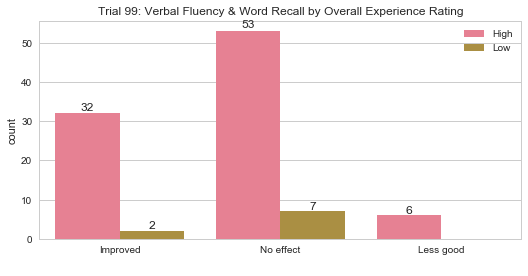

In [87]:
count_plot(df_99,'Verbal_Fluency_Word_Recall', 'Trial 99: Verbal Fluency & Word Recall')

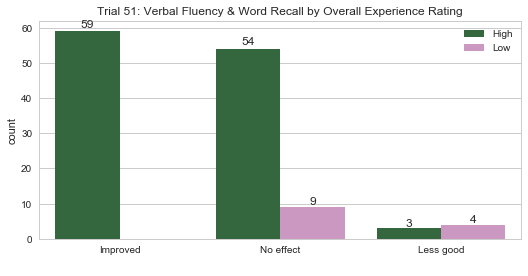

In [88]:
count_plot(df_51,'Verbal_Fluency_Word_Recall', 'Trial 51: Verbal Fluency & Word Recall')

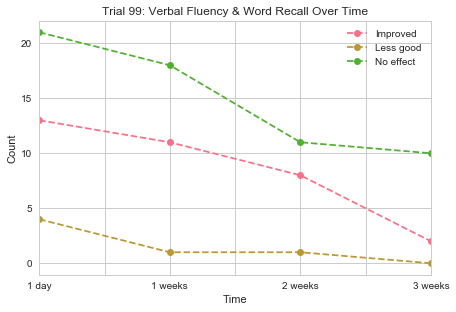

In [89]:
OT_plot(df_99,'Verbal_Fluency_Word_Recall', 'Trial 99: Verbal Fluency & Word Recall')

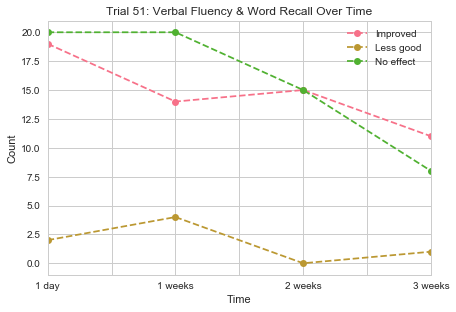

In [90]:
OT_plot(df_51,'Verbal_Fluency_Word_Recall', 'Trial 51: Verbal Fluency & Word Recall')

# Creativity and Insight

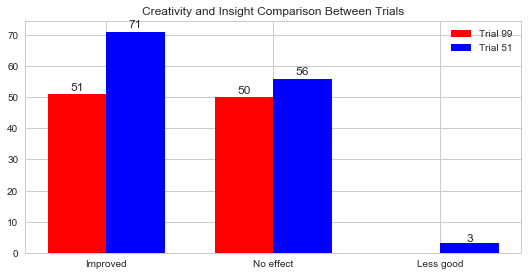

In [91]:
plotting(df_99, df_51, 'Creativity_Insight', 'Creativity and Insight Comparison Between Trials')

In [92]:
basicinfo(df_99, 'Creativity_Insight')

Improved     51
No effect    50
Name: Creativity_Insight, dtype: int64
	
count          101
unique           2
top       Improved
freq            51
Name: Creativity_Insight, dtype: object
	
Improved     0.50495
No effect    0.49505
Name: Creativity_Insight, dtype: float64


In [93]:
basicinfo(df_99, 'Creativity_Insight')

Improved     51
No effect    50
Name: Creativity_Insight, dtype: int64
	
count          101
unique           2
top       Improved
freq            51
Name: Creativity_Insight, dtype: object
	
Improved     0.50495
No effect    0.49505
Name: Creativity_Insight, dtype: float64


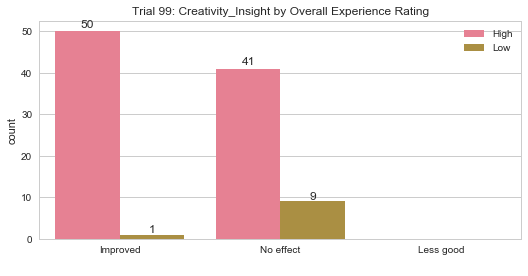

In [94]:
count_plot(df_99, 'Creativity_Insight', 'Trial 99: Creativity_Insight')

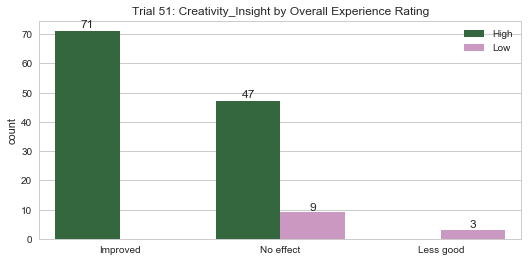

In [95]:
count_plot(df_51, 'Creativity_Insight', 'Trial 51: Creativity_Insight')

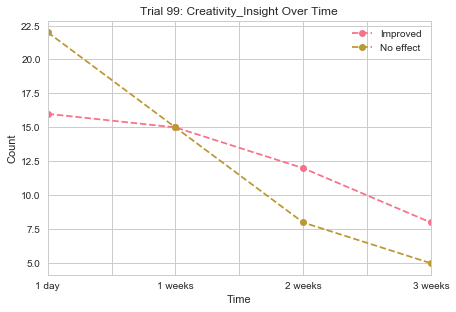

In [96]:
OT_plot(df_99, 'Creativity_Insight', 'Trial 99: Creativity_Insight')

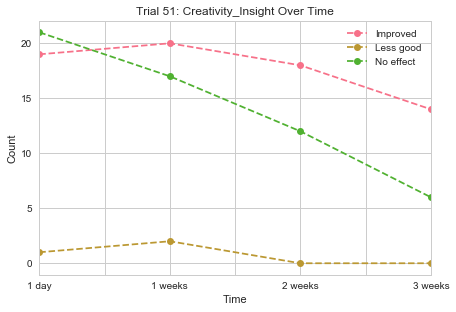

In [97]:
OT_plot(df_51, 'Creativity_Insight', 'Trial 51: Creativity_Insight')

Text(0.5,1,'Trial 99: Creativity and Insight by User')

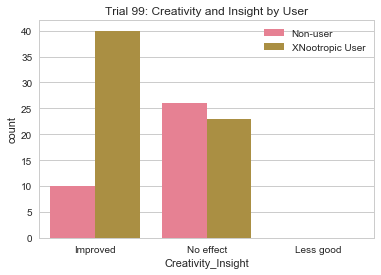

In [98]:
sns.countplot(x='Creativity_Insight', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Trial 99: Creativity and Insight by User')

Text(0.5,1,'Trial 51: Creativity and Insight by User')

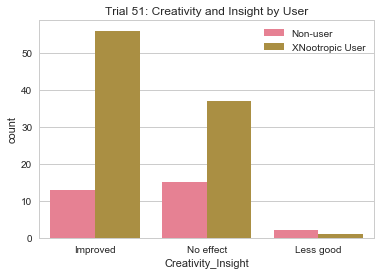

In [99]:
sns.countplot(x='Creativity_Insight', data=df_51, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Trial 51: Creativity and Insight by User')

# Interpersonal Capbility and Empathy

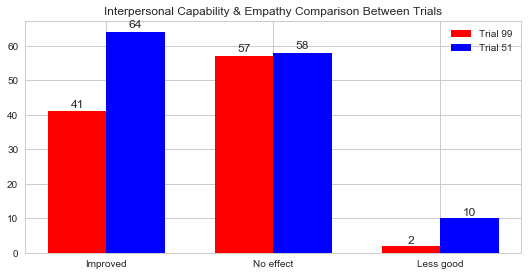

In [100]:
plotting(df_99, df_51, 'InterpersonalCapability_Empathy','Interpersonal Capability & Empathy Comparison Between Trials')

In [101]:
basicinfo(df_99, 'InterpersonalCapability_Empathy')

No effect    57
Improved     41
Less good     2
Name: InterpersonalCapability_Empathy, dtype: int64
	
count           100
unique            3
top       No effect
freq             57
Name: InterpersonalCapability_Empathy, dtype: object
	
No effect    0.57
Improved     0.41
Less good    0.02
Name: InterpersonalCapability_Empathy, dtype: float64


In [102]:
basicinfo(df_51, 'InterpersonalCapability_Empathy')

Improved     64
No effect    58
Less good    10
Name: InterpersonalCapability_Empathy, dtype: int64
	
count          132
unique           3
top       Improved
freq            64
Name: InterpersonalCapability_Empathy, dtype: object
	
Improved     0.484848
No effect    0.439394
Less good    0.075758
Name: InterpersonalCapability_Empathy, dtype: float64


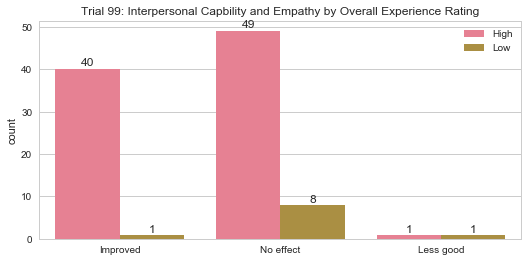

In [103]:
count_plot(df_99, 'InterpersonalCapability_Empathy', 'Trial 99: Interpersonal Capbility and Empathy')

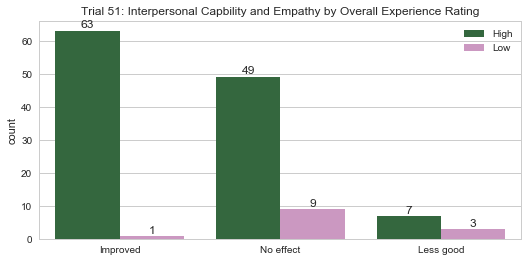

In [104]:
count_plot(df_51, 'InterpersonalCapability_Empathy', 'Trial 51: Interpersonal Capbility and Empathy')

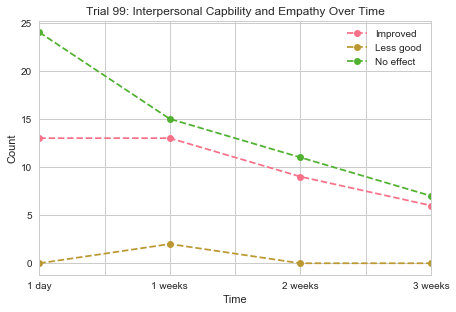

In [105]:
OT_plot(df_99, 'InterpersonalCapability_Empathy', 'Trial 99: Interpersonal Capbility and Empathy')

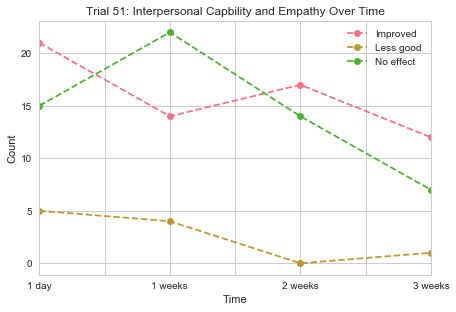

In [106]:
OT_plot(df_51, 'InterpersonalCapability_Empathy', 'Trial 51: Interpersonal Capbility and Empathy')

Text(0.5,1,'Interpersonal Capability and Empathy')

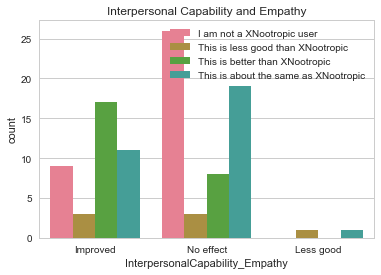

In [107]:
sns.countplot(x='InterpersonalCapability_Empathy', data=df_99, hue='Current_User_Comparison', order=x_order2)
plt.legend(loc='upper right')
plt.title('Interpersonal Capability and Empathy')

# Emotional Stability

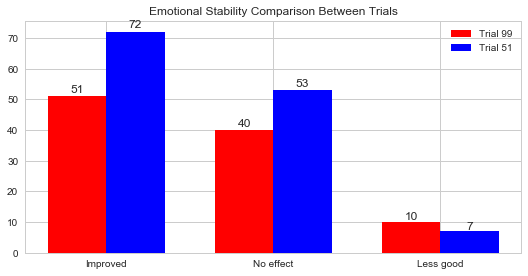

In [108]:
plotting(df_99, df_51, 'Emotional_Stability', 'Emotional Stability Comparison Between Trials')

In [109]:
basicinfo(df_99, 'Emotional_Stability')

Improved     51
No effect    40
Less good    10
Name: Emotional_Stability, dtype: int64
	
count          101
unique           3
top       Improved
freq            51
Name: Emotional_Stability, dtype: object
	
Improved     0.50495
No effect    0.39604
Less good    0.09901
Name: Emotional_Stability, dtype: float64


In [110]:
basicinfo(df_51, 'Emotional_Stability')

Improved     72
No effect    53
Less good     7
Name: Emotional_Stability, dtype: int64
	
count          132
unique           3
top       Improved
freq            72
Name: Emotional_Stability, dtype: object
	
Improved     0.545455
No effect    0.401515
Less good    0.053030
Name: Emotional_Stability, dtype: float64


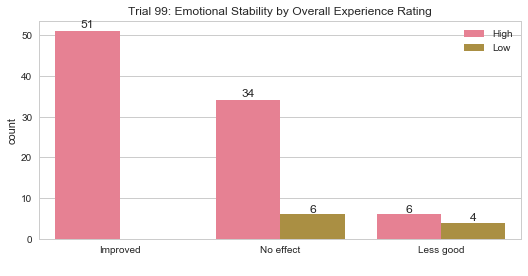

In [111]:
count_plot(df_99, 'Emotional_Stability', 'Trial 99: Emotional Stability')

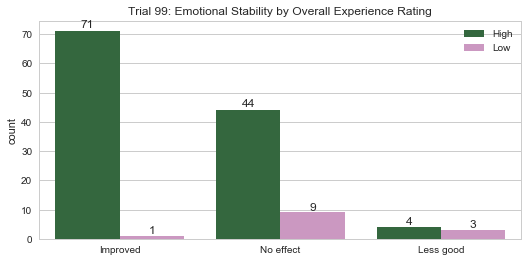

In [112]:
count_plot(df_51, 'Emotional_Stability', 'Trial 99: Emotional Stability')

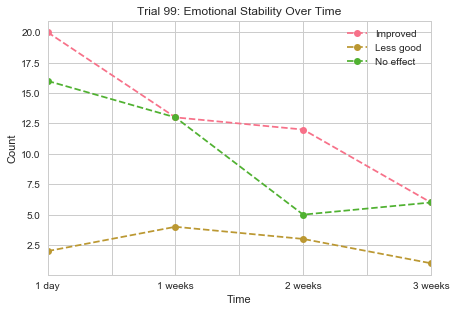

In [113]:
OT_plot(df_99, 'Emotional_Stability', 'Trial 99: Emotional Stability')

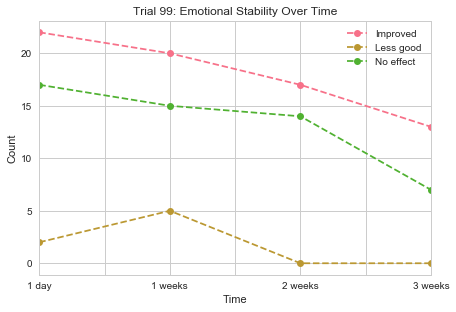

In [114]:
OT_plot(df_51, 'Emotional_Stability', 'Trial 99: Emotional Stability')

Text(0.5,1,'Emotional Stability ')

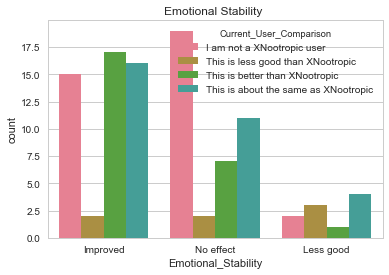

In [115]:
sns.countplot(x='Emotional_Stability', data=df_99, hue='Current_User_Comparison', order=x_order2)
plt.title('Emotional Stability ')

# Euphoria, Joy and Happiness

In [116]:
plotting(df_99, df_51, 'Euphoria_Joy_Happiness', 'Euphoria, Joy, and Happiness Comparison Between Trials')

KeyError: 'Euphoria_Joy_Happiness'

In [ ]:
basicinfo(df_99, 'Euphoria_Joy_Happiness' )

In [ ]:
basicinfo(df_51, 'Euphoria_Joy_Happiness' )

In [ ]:
count_plot(df_99, 'Euphoria_Joy_Happiness', 'Trial 99: Euphoria, Joy, and Happiness')

In [ ]:
count_plot(df_51, 'Euphoria_Joy_Happiness', 'Trial51: Euphoria, Joy, and Happiness')

In [ ]:
OT_plot(df_99, 'Euphoria_Joy_Happiness', 'Trial 99: Euphoria, Joy, and Happiness')

In [ ]:
OT_plot(df_51, 'Euphoria_Joy_Happiness', 'Trial 51: Euphoria, Joy, and Happiness')

# Estimated Effect Duration

In [ ]:
plotting(df_99, df_51, 'Estimated_Effect_Duration', 'Estimated Effect Duration Comparison Between Trials', sort=False)

In [ ]:
basicinfo(df_99, 'Estimated_Effect_Duration')

In [ ]:
basicinfo(df_51, 'Estimated_Effect_Duration')

In [ ]:
fig, ax = plt.subplots(figsize=(7.5,4))

ax = sns.countplot(x='Estimated_Effect_Duration', data=df_99, hue='Overall_Exp_Rating')
total = len(df_99['Estimated_Effect_Duration'])
for p in ax.patches:
    height = p.get_height()
    if math.isnan(height)==False:
        ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')   
        ax.set_title('Trial 99: Estimated Effect Duration by Overall Experience Rating')
        ax.set_xlabel(' ')
        ax.legend(loc='upper right')
        plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(7.5,4))

ax = sns.countplot(x='Estimated_Effect_Duration', data=df_51, hue='Overall_Exp_Rating')
total = len(df_51['Estimated_Effect_Duration'])

m99 = max(df_99['Estimated_Effect_Duration'].value_counts())


for p in ax.patches:
    height = p.get_height()
    if math.isnan(height)==False:
        ax.text(p.get_x() + p.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')   
        ax.set_title('Trial 51: 99: Estimated Effect Duration by Overall Experience Rating')
        ax.set_xlabel(' ')
        ax.legend(loc='upper right')
        ax.set_yticks(np.arange(0, m99 + 20, 10))
        plt.tight_layout()
plt.show()

In [ ]:
OT_plot(df_99, 'Estimated_Effect_Duration', 'Trial 99: Estimated Effect Duration')

In [ ]:
OT_plot(df_51, 'Estimated_Effect_Duration', 'Trial 51: Estimated Effect Duration')